<a href="https://colab.research.google.com/github/umeshnmenon/EVA4/blob/master/EVA4_S5_Assmnt_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Target:
  ## 1.Add Regularization - Dropout
  ## 2.Add Dropout to each layer

# Result:
   ## 1.Parameter:7,600
   ## 2.Best train accuracy:98.34
   ## 3.best test accuracy:99.02(14th epoch)

# Analysis:
   ## 1. The model is not over-fitting
   ## 2. The model is under fitting because we using droupout to every layer and making model to train hard
   ## 3. Add a layer after Gobal average pooling.Adding dense layer after GAP
   
   

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),           #conv1  1 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                              #RF:3
                                 nn.BatchNorm2d(16),                     #o/p:26
                                 nn.Dropout2d(0.04))
        
        self.conv2=nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0,bias=False),          #conv2  16 input , 32 0utput and 3x3 kernel
                                 nn.ReLU(),                              #RF:5
                                 nn.BatchNorm2d(32),                     #o/p:24
                                 nn.Dropout2d(0.04))
        
        # used 1x1 kernel 
        self.conv3=nn.Sequential(nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(1, 1), padding=0, bias=False))           #conv3  32 input , 8 0utput and 1x1 kernel 
                                                                         #RF:5
                                                                         #o/p:24
        
        self.maxpool=nn.MaxPool2d(2,2)                                   # maxpooling 2x2 kernel and stride 2
                                                                         #RF:6
                                                                         #o/p:12

        self.conv4=nn.Sequential(nn.Conv2d(8,8,3,bias=False),           #conv4  8 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                             #RF:10
                                 nn.BatchNorm2d(8),                     #o/p:10
                                 nn.Dropout2d(0.04))
        
        self.conv5=nn.Sequential(nn.Conv2d(8,8,3,bias=False),          #conv5  16 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                            #RF:14
                                 nn.BatchNorm2d(8),                     #o/p:8
                                 nn.Dropout2d(0.04))
        
       # self.maxpool=nn.MaxPool2d(2,2)
        
        self.conv6=nn.Sequential(nn.Conv2d(8,8,3,padding=1,bias=False),  #conv6  16 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                              #RF:18
                                 nn.BatchNorm2d(8),                      #o/p:8
                                 nn.Dropout2d(0.04))
        
        self.conv7=nn.Sequential(nn.Conv2d(8,10,3,bias=False))           #conv7  16 input , 10 0utput and 3x3 kernel
                                                                         #RF:22

                                                                          #o/p:6 
                                  
        
        self.GAP=nn.AvgPool2d(6)                                        # Gobal Average Pooling 
                                                                        #RF:32
                                                                        #o/p:1

        #self.conv8 = nn.Sequential(nn.Conv2d(10,10,1, padding=0, bias=False))                                               
       
             
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)
        x=self.conv3(x)
        x=self.maxpool(x)
        x=self.conv4(x)
        x=self.conv5(x)
        x=self.conv6(x)
        x=self.conv7(x)
        x=self.GAP(x)
       # x=self.conv8(x)
        x=x.view(-1,10)
        return F.log_softmax(x)


!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
         Dropout2d-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
         Dropout2d-8           [-1, 32, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             256
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11            [-1, 8, 10, 10]             576
             ReLU-12            [-1, 8, 10, 10]               0
      BatchNorm2d-13            [-1, 8, 10, 10]              16
        Dropout2d-14            [-1, 8,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:

torch.manual_seed(12)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                       # transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

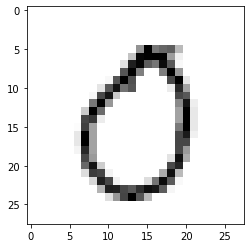

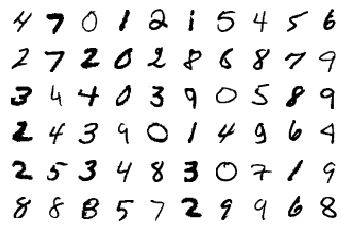

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[3].numpy().squeeze(), cmap='gray_r')

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [0]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    print("epoches:",epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

epoches: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.2591300904750824 Batch_id=468 Accuracy=85.00: 100%|██████████| 469/469 [00:11<00:00, 39.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0973, Accuracy: 9722/10000 (97.22%)

epoches: 2


Loss=0.1525292545557022 Batch_id=468 Accuracy=95.94: 100%|██████████| 469/469 [00:11<00:00, 40.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0607, Accuracy: 9821/10000 (98.21%)

epoches: 3


Loss=0.155695378780365 Batch_id=468 Accuracy=96.73: 100%|██████████| 469/469 [00:11<00:00, 42.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0497, Accuracy: 9834/10000 (98.34%)

epoches: 4


Loss=0.23485738039016724 Batch_id=468 Accuracy=97.22: 100%|██████████| 469/469 [00:12<00:00, 38.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0443, Accuracy: 9854/10000 (98.54%)

epoches: 5


Loss=0.10558553785085678 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:12<00:00, 41.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 9868/10000 (98.68%)

epoches: 6


Loss=0.07124006748199463 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:11<00:00, 40.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0373, Accuracy: 9869/10000 (98.69%)

epoches: 7


Loss=0.027358099818229675 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:11<00:00, 42.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9883/10000 (98.83%)

epoches: 8


Loss=0.06112584099173546 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:11<00:00, 35.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0359, Accuracy: 9875/10000 (98.75%)

epoches: 9


Loss=0.1830618530511856 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:12<00:00, 38.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9895/10000 (98.95%)

epoches: 10


Loss=0.10249773412942886 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:11<00:00, 40.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9867/10000 (98.67%)

epoches: 11


Loss=0.017881711944937706 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:11<00:00, 40.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9892/10000 (98.92%)

epoches: 12


Loss=0.1369500309228897 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:11<00:00, 40.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9890/10000 (98.90%)

epoches: 13


Loss=0.020283659920096397 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:12<00:00, 38.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0294, Accuracy: 9897/10000 (98.97%)

epoches: 14


Loss=0.017296919599175453 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:12<00:00, 39.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9902/10000 (99.02%)

epoches: 15


Loss=0.032414812594652176 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:11<00:00, 40.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 9901/10000 (99.01%)

epoches: 16


Loss=0.1301061511039734 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:11<00:00, 41.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9902/10000 (99.02%)

epoches: 17


Loss=0.06304971873760223 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:11<00:00, 39.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0281, Accuracy: 9908/10000 (99.08%)

epoches: 18


Loss=0.03614738583564758 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:11<00:00, 34.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0262, Accuracy: 9911/10000 (99.11%)

epoches: 19


Loss=0.015266363508999348 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:11<00:00, 39.81it/s]



Test set: Average loss: 0.0251, Accuracy: 9907/10000 (99.07%)

